In [70]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [71]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [72]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
Base = automap_base()

In [73]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [74]:
# reflect an existing database into a new model

# reflect the tables
Base.prepare(engine, reflect=True)


In [75]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [76]:
# Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [77]:
# Create our session (link) from Python to the DB
session = Session(engine)


## Bonus Challenge Assignment: Temperature Analysis II

In [78]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [79]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
print(calc_temps("2017-08-01","2017-08-07"))

[(72.0, 79.25, 83.0)]


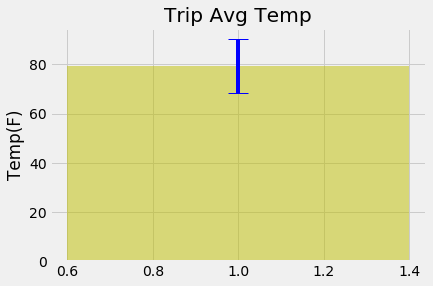

In [89]:
# Plot the results from your previous query as a bar chart. 
my_trip=list(calc_temps("2017-08-01","2017-08-07"))
length_my_trip=len(calc_temps("2017-08-01","2017-08-07"))
high_avg=[my_trip[0][1]]
y_error=[my_trip[0][2]-my_trip[0][0]]

# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar(length_my_trip, high_avg, yerr=y_error, alpha=0.5, ecolor='b', capsize=10,color="y")
plt.title('Trip Avg Temp')
plt.ylabel("Temp(F)")

plt.show()

### Daily Rainfall Average

In [104]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
start=dt.date(2017,8,1)
end=dt.date(2017,8,7)


In [105]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
column_name = [func.count(Measurement.prcp),Station.station, Station.name,Station.latitude, Station.longitude, Station.elevation]
station_data = session.query(*column_name).filter(Measurement.station == Station.station).filter(Measurement.date >=start).filter(Measurement.date <= end).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
station_data
for record in station_data:

    (m_prcp,s_station,s_name,s_lat,s_long,s_elevation) = record
    print(f"'precip' {m_prcp} 'station' {s_station} 'name' {s_name} 'lat' {s_lat}   'long' {s_long} 'elevation' {s_elevation}")


'precip' 7 'station' USC00519397 'name' WAIKIKI 717.2, HI US 'lat' 21.2716   'long' -157.8168 'elevation' 3.0
'precip' 6 'station' USC00519523 'name' WAIMANALO EXPERIMENTAL FARM, HI US 'lat' 21.33556   'long' -157.71139 'elevation' 19.5
'precip' 6 'station' USC00514830 'name' KUALOA RANCH HEADQUARTERS 886.9, HI US 'lat' 21.5213   'long' -157.8374 'elevation' 7.0
'precip' 3 'station' USC00519281 'name' WAIHEE 837.5, HI US 'lat' 21.45167   'long' -157.84888999999998 'elevation' 32.9
'precip' 3 'station' USC00516128 'name' MANOA LYON ARBO 785.2, HI US 'lat' 21.3331   'long' -157.8025 'elevation' 152.4


In [83]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).first()

# For example
daily_normals("01-01")

(62.0, 69.15384615384616, 77.0)

In [84]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'
start=dt.date(2017,8,1)
end=dt.date(2017,8,7)

# Use the start and end date to create a range of dates
numdays=7
date_list = [start + dt.timedelta(days=x) for x in range(numdays)]


# Strip off the year and save a list of strings in the format %m-%d
date_string=[date.strftime("%m-%d") for date in date_list]


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
normals=[tuple([date])+daily_normals(date) for date in date_string]
normals

[('08-01', 67.0, 75.54, 83.0),
 ('08-02', 68.0, 75.60377358490567, 84.0),
 ('08-03', 70.0, 76.61111111111111, 85.0),
 ('08-04', 69.0, 76.71153846153847, 84.0),
 ('08-05', 69.0, 76.14814814814815, 82.0),
 ('08-06', 67.0, 76.25, 83.0),
 ('08-07', 71.0, 77.15686274509804, 83.0)]

In [85]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_temp_df = pd.DataFrame(normals, columns=['trip_dates', 'TMin', 'TAvg','TMax'])
trip_temp_df.set_index("trip_dates",inplace=True)
trip_temp_df

,TMin,TAvg,TMax
trip_dates,,,
08-01,67.0,75.540000,83.0
08-02,68.0,75.603774,84.0
08-03,70.0,76.611111,85.0
08-04,69.0,76.711538,84.0
08-05,69.0,76.148148,82.0
08-06,67.0,76.250000,83.0
08-07,71.0,77.156863,83.0


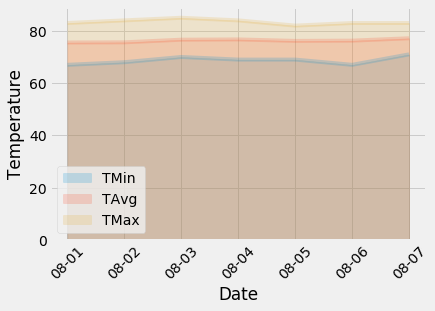

In [86]:
# Plot the daily normals as an area plot with `stacked=False`
trip_temp_df.plot.area(stacked=False,rot=45,alpha=0.2)
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.show()

## Close Session

In [87]:
session.close()